<a href="https://colab.research.google.com/github/KudratBatta/Advance-Python-Project/blob/main/advance_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Question 1: Create a file that contains 1000 lines of random strings.

import random
import string

num_lines = 1000
string_length = 12

with open("random_strings.txt", "w") as file:
    for _ in range(num_lines):
        random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=string_length))
        file.write(random_string + "\n")

print("File 'random_strings.txt' has been created with 1000 random strings.")


File 'random_strings.txt' has been created with 1000 random strings.


In [8]:
# Question 2: Create a file that contains multiple lines of random strings and file size must be 5 MB.

import random
import string
import os

# Target file size: 5 MB
target_size_bytes = 5 * 1024 * 1024  # 5 megabytes

# Function to generate a random string of specified length
def generate_random_string(length=100):
    characters = string.ascii_letters + string.digits
    return ''.join(random.choices(characters, k=length))

# Create and write to the file
file_name = "random_5MB_strings.txt"
with open(file_name, "w") as file:
    while file.tell() < target_size_bytes:
        random_line = generate_random_string(100) + "\n"
        file.write(random_line)

print(f"File '{file_name}' has been created with size approximately 5 MB.")


File 'random_5MB_strings.txt' has been created with size approximately 5 MB.


In [9]:
# Question 3: Create 10 files that contains multiple lines of random strings and file size of each file must be 5 MB.

import random
import string
import os

num_files = 10
target_size_bytes = 5 * 1024 * 1024  # 5 MB per file
string_length = 100
file_prefix = "random_file_"

def generate_random_string(length=100):
    characters = string.ascii_letters + string.digits
    return ''.join(random.choices(characters, k=length))

for i in range(1, num_files + 1):
    filename = f"{file_prefix}{i}.txt"
    with open(filename, "w") as file:
        while file.tell() < target_size_bytes:
            line = generate_random_string(string_length) + "\n"
            file.write(line)
    print(f"Created '{filename}' with size approximately 5 MB.")

print("All files have been created.")


Created 'random_file_1.txt' with size approximately 5 MB.
Created 'random_file_2.txt' with size approximately 5 MB.
Created 'random_file_3.txt' with size approximately 5 MB.
Created 'random_file_4.txt' with size approximately 5 MB.
Created 'random_file_5.txt' with size approximately 5 MB.
Created 'random_file_6.txt' with size approximately 5 MB.
Created 'random_file_7.txt' with size approximately 5 MB.
Created 'random_file_8.txt' with size approximately 5 MB.
Created 'random_file_9.txt' with size approximately 5 MB.
Created 'random_file_10.txt' with size approximately 5 MB.
All files have been created.


In [6]:
# Question 4: Create 5 files of size 1GB, 2GB, 3GB, 4GB and 5GB; file contains multiple lines of random strings

import random
import string
import os

file_sizes_gb = [1, 2, 3, 4, 5]
file_prefix = "large_file_"
string_length = 100
lines_per_chunk = 10000

def generate_random_lines(num_lines, length):
    characters = string.ascii_letters + string.digits
    return '\n'.join(
        ''.join(random.choices(characters, k=length)) for _ in range(num_lines)
    ) + '\n'

# Create each file
for size_gb in file_sizes_gb:
    target_size = size_gb * 1024 * 1024 * 1024  # Convert GB to bytes
    file_name = f"{file_prefix}{size_gb}GB.txt"
    print(f"Creating {file_name}...")

    with open(file_name, "w", buffering=1024*1024) as f:  # 1MB buffer
        while f.tell() < target_size:
            chunk = generate_random_lines(lines_per_chunk, string_length)
            f.write(chunk)

    final_size = os.path.getsize(file_name)
    print(f"✅ {file_name} created (size: {final_size / (1024 ** 3):.2f} GB)")

print("✅ All files successfully created.")


Creating large_file_1GB.txt...
✅ large_file_1GB.txt created (size: 1.00 GB)
Creating large_file_2GB.txt...
✅ large_file_2GB.txt created (size: 2.00 GB)
Creating large_file_3GB.txt...
✅ large_file_3GB.txt created (size: 3.00 GB)
Creating large_file_4GB.txt...
✅ large_file_4GB.txt created (size: 4.00 GB)
Creating large_file_5GB.txt...
✅ large_file_5GB.txt created (size: 5.00 GB)
✅ All files successfully created.


In [10]:
# Question 5: convert these files into upper case

import os

file_sizes_gb = [1, 2, 3, 4, 5]
file_prefix = "large_file_"
output_suffix = "_upper.txt"
chunk_size = 1024 * 1024 * 10  # 10 MB chunks

# Process each file
for size_gb in file_sizes_gb:
    input_file = f"{file_prefix}{size_gb}GB.txt"
    output_file = f"{file_prefix}{size_gb}GB{output_suffix}"

    print(f"Converting {input_file} to uppercase...")

    with open(input_file, "r", buffering=1024*1024) as fin, \
         open(output_file, "w", buffering=1024*1024) as fout:

        while True:
            chunk = fin.read(chunk_size)
            if not chunk:
                break
            fout.write(chunk.upper())

    print(f"✅ Created {output_file}")

print("✅ All files converted to uppercase.")



Converting large_file_1GB.txt to uppercase...
✅ Created large_file_1GB_upper.txt
Converting large_file_2GB.txt to uppercase...
✅ Created large_file_2GB_upper.txt
Converting large_file_3GB.txt to uppercase...
✅ Created large_file_3GB_upper.txt
Converting large_file_4GB.txt to uppercase...
✅ Created large_file_4GB_upper.txt
Converting large_file_5GB.txt to uppercase...
✅ Created large_file_5GB_upper.txt
✅ All files converted to uppercase.


In [11]:
# Question 6: Convert all the files of Q4 into upper case parallel using multi-threading.

import os
from concurrent.futures import ThreadPoolExecutor

file_sizes_gb = [1, 2, 3, 4, 5]
file_prefix = "large_file_"
output_suffix = "_upper.txt"
chunk_size = 1024 * 1024 * 10

# Function to convert a single file to uppercase
def convert_file_to_upper(size_gb):
    input_file = f"{file_prefix}{size_gb}GB.txt"
    output_file = f"{file_prefix}{size_gb}GB{output_suffix}"
    print(f"🔄 Starting: {input_file}")

    with open(input_file, "r", buffering=1024*1024) as fin, \
         open(output_file, "w", buffering=1024*1024) as fout:

        while True:
            chunk = fin.read(chunk_size)
            if not chunk:
                break
            fout.write(chunk.upper())

    print(f"✅ Finished: {output_file}")

# Thread pool to run conversions in parallel
with ThreadPoolExecutor(max_workers=5) as executor:
    executor.map(convert_file_to_upper, file_sizes_gb)

print("✅ All files converted to uppercase using multithreading.")


🔄 Starting: large_file_1GB.txt🔄 Starting: large_file_2GB.txt

🔄 Starting: large_file_3GB.txt
🔄 Starting: large_file_4GB.txt
🔄 Starting: large_file_5GB.txt
✅ Finished: large_file_1GB_upper.txt
✅ Finished: large_file_2GB_upper.txt
✅ Finished: large_file_3GB_upper.txt
✅ Finished: large_file_4GB_upper.txt
✅ Finished: large_file_5GB_upper.txt
✅ All files converted to uppercase using multithreading.


In [12]:
# Question 7: WAP to automatically download 10 images of cat from “Google Images”. [Hint: Find the package from
# pypi.org and use it]

!pip install icrawler

from icrawler.builtin import GoogleImageCrawler

# Create a folder and download 10 cat images
google_crawler = GoogleImageCrawler(storage={'root_dir': 'cat_images'})
google_crawler.crawl(keyword='cat', max_num=10)

print("✅ Downloaded 10 cat images to the 'cat_images/' folder.")



ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Cat_August_2010-4.jpg
ERROR:downloader:Response status code 403, file http://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Cat_07464_kalamis_safinaz.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1443562748/photo/cute-ginger-cat.jpg
ERROR:downloader:Response status code 401, file https://i.guim.co.uk/img/media/327aa3f0c3b8e40ab03b4ae80319064e401c6fbc/377_133_3542_2834/master/3542.jpg
ERROR:downloader:Response status code 400, file https://icatcare.org/img/asset/aW1hZ2VzL2N1dG91dHMvYWRvYmVzdG9ja18zMTYzODM5NjkucG5n/adobestock_316383969.png


✅ Downloaded 10 cat images to the 'cat_images/' folder.


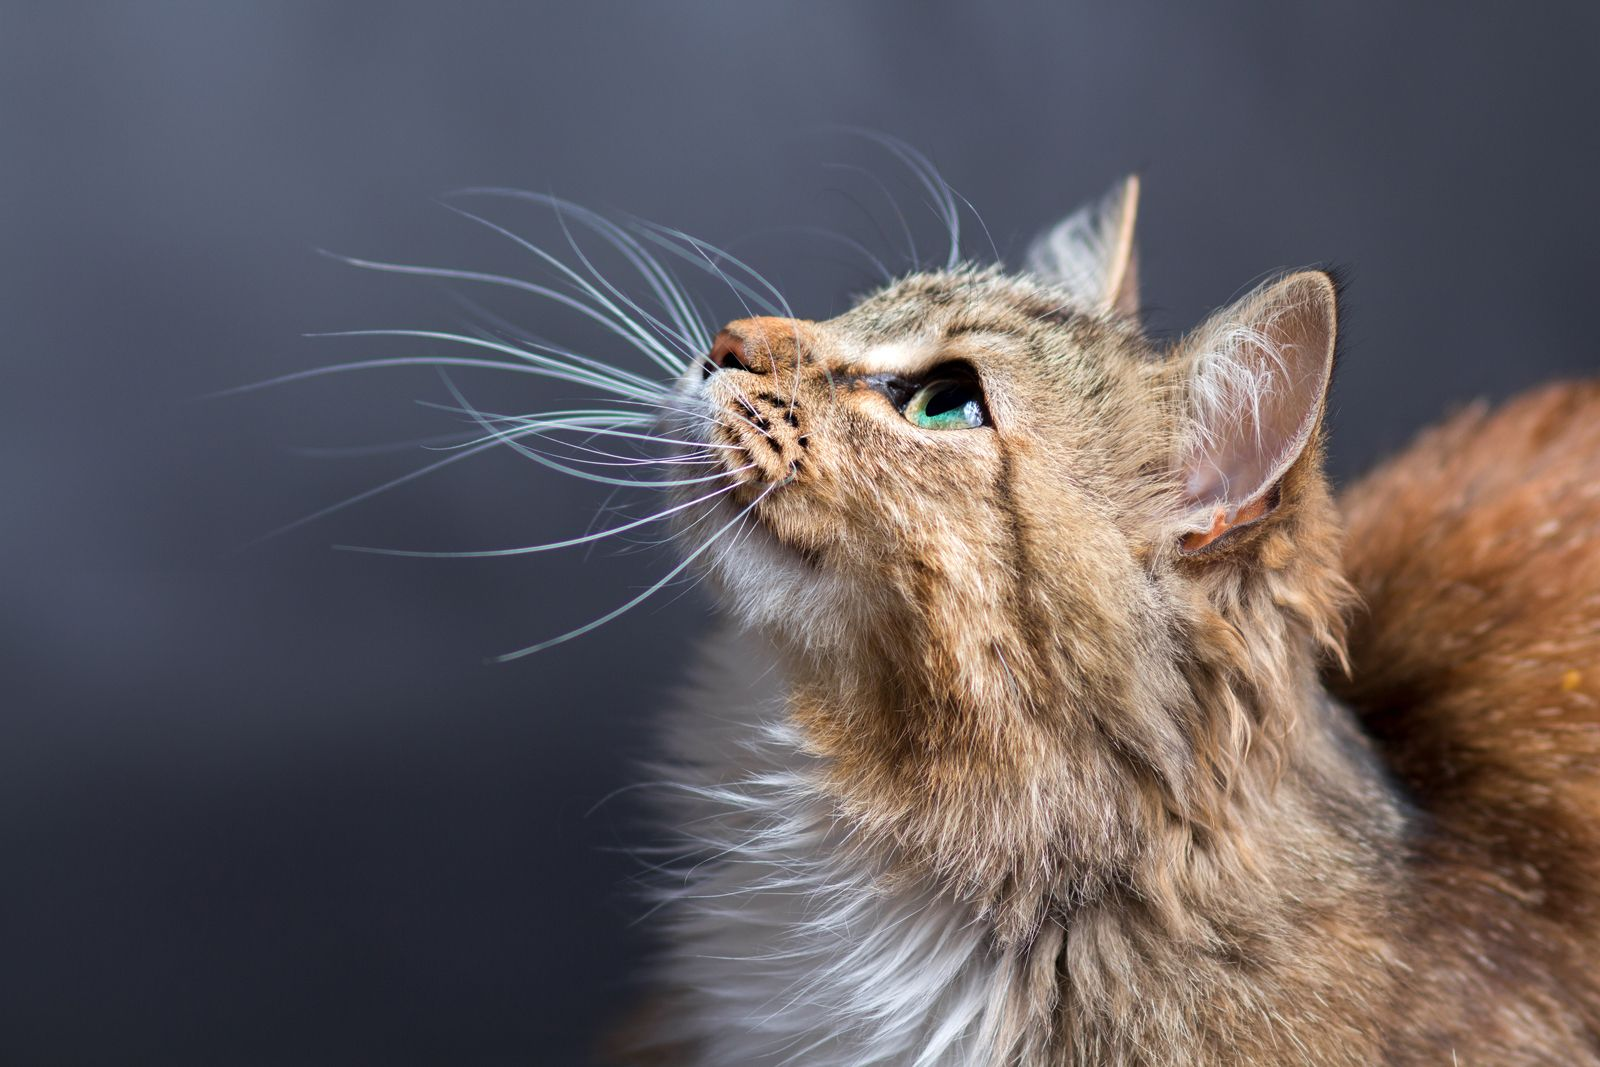

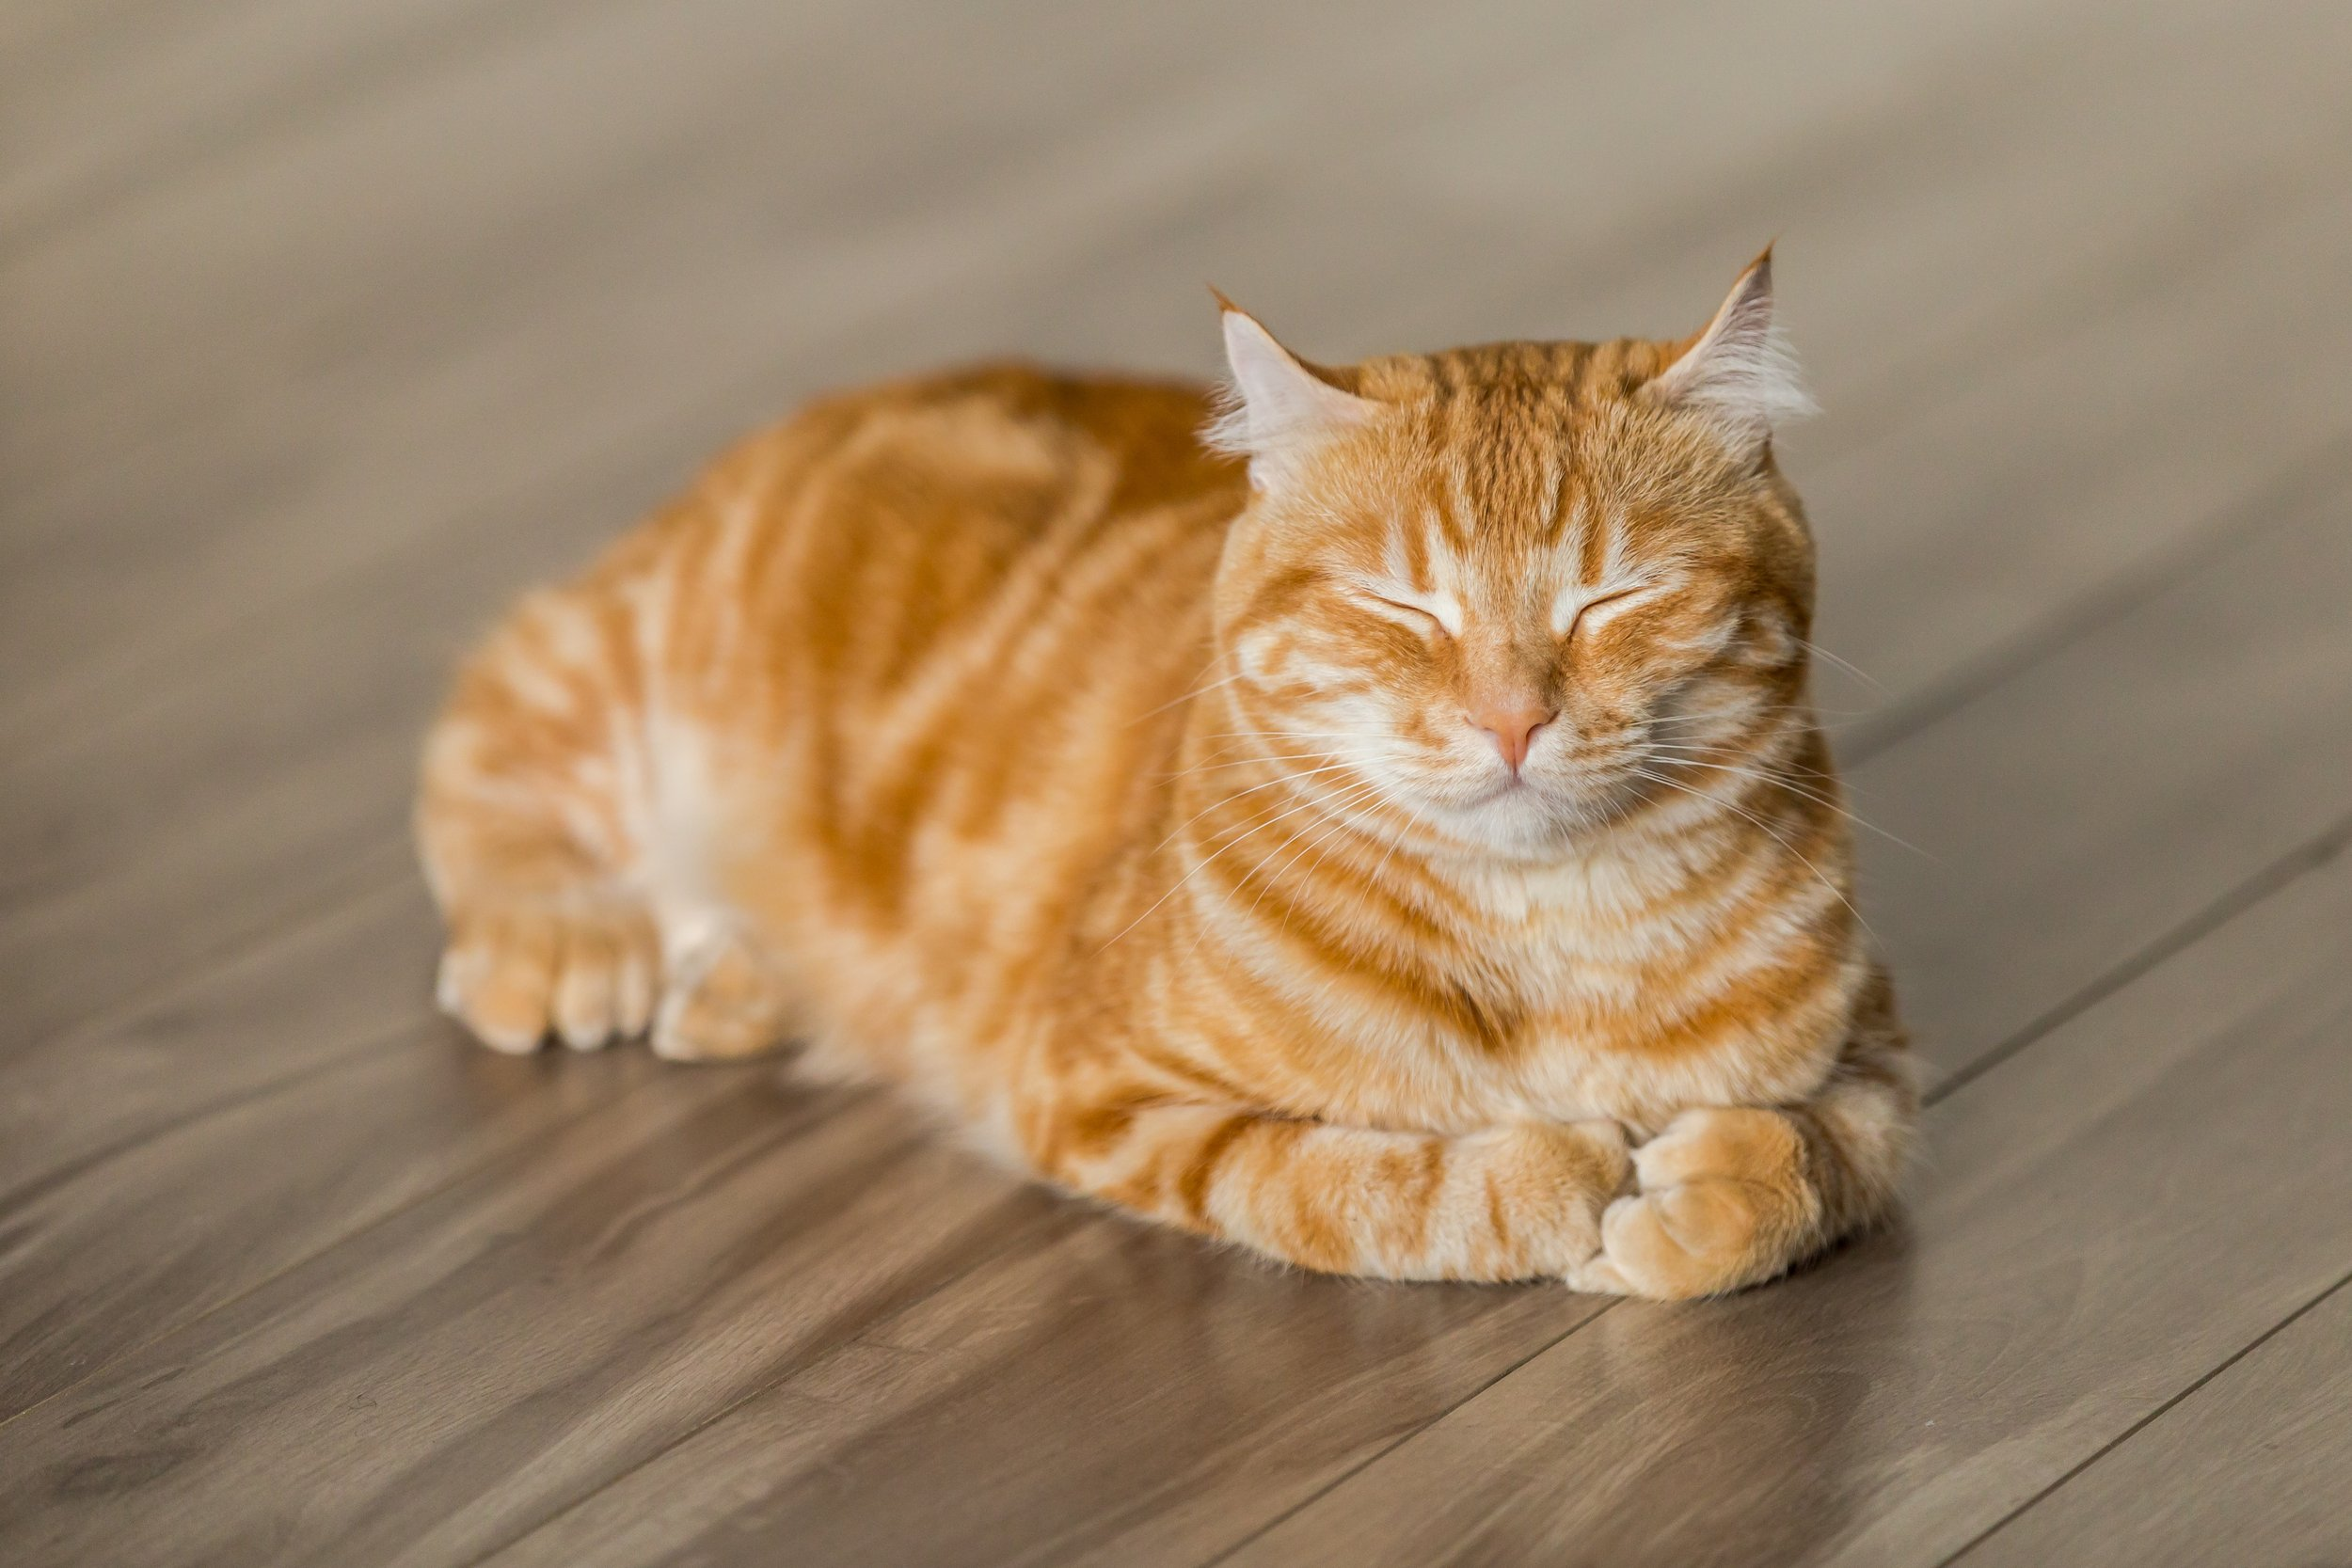

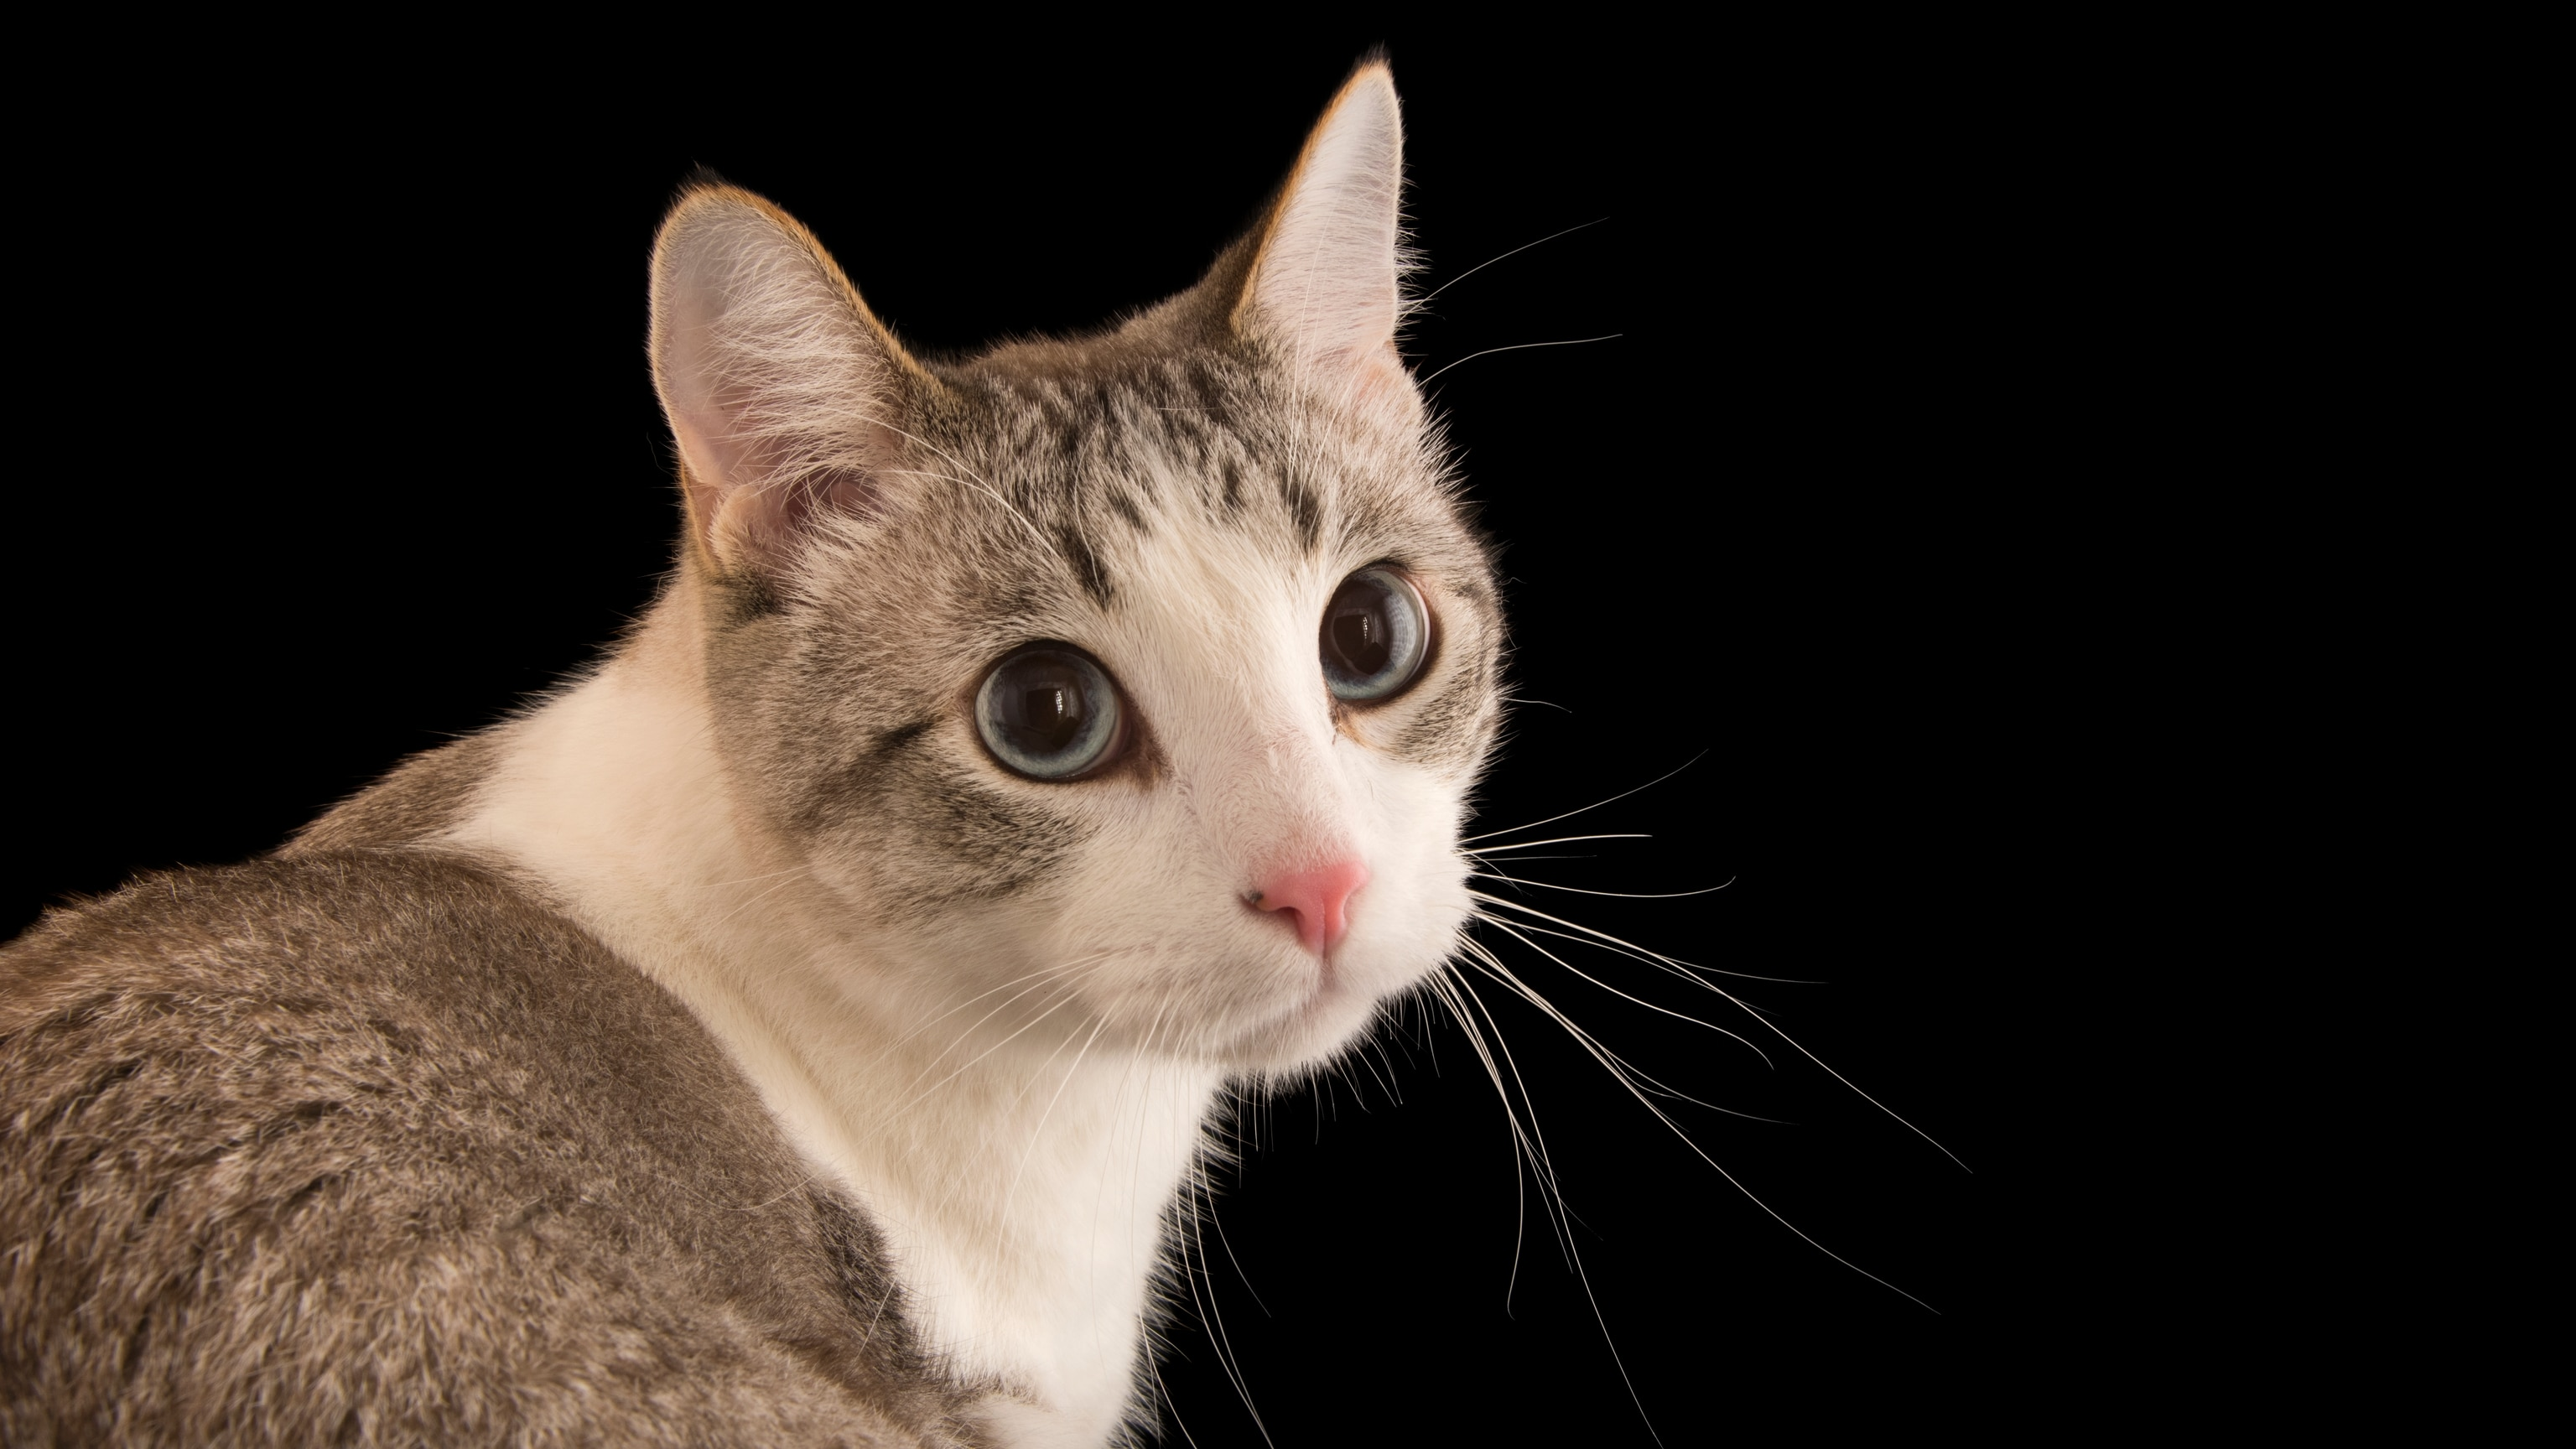

In [13]:
import os
from IPython.display import Image, display

image_folder = 'cat_images'
image_files = os.listdir(image_folder)

# Display the first 3 downloaded images
for img_file in image_files[:3]:
    display(Image(filename=os.path.join(image_folder, img_file)))


In [14]:
# Question 8:

# WAP to automatically download 10 videos of “Machine Learning” from “Youtube.com”. [Hint: Find the
# package from pypi.org and use it]

!pip install yt-dlp



In [15]:
import os
import yt_dlp

# List of 10 YouTube video URLs (related to Machine Learning)
video_urls = [
    "https://www.youtube.com/watch?v=GwIo3gDZCVQ",
    "https://www.youtube.com/watch?v=aircAruvnKk",
    "https://www.youtube.com/watch?v=KTeVOb8gaD4",
    "https://www.youtube.com/watch?v=HZARImviDxg",
    "https://www.youtube.com/watch?v=8tq1C8spV_g",
    "https://www.youtube.com/watch?v=ukzFI9rgwfU",
    "https://www.youtube.com/watch?v=vnQ2dAX-H1g",
    "https://www.youtube.com/watch?v=QPKj9ROGT-A",
    "https://www.youtube.com/watch?v=Gv9_4yMHFhI",
    "https://www.youtube.com/watch?v=1i0zu9jHN6U"
]

# Output directory
output_dir = "ml_videos"
os.makedirs(output_dir, exist_ok=True)

# Download options
ydl_opts = {
    'format': 'best',
    'outtmpl': os.path.join(output_dir, '%(title).80s.%(ext)s'),
    'quiet': False,
    'noplaylist': True,
}

# Download videos
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    for url in video_urls:
        try:
            print(f"Downloading: {url}")
            ydl.download([url])
            print("✅ Downloaded successfully.\n")
        except Exception as e:
            print(f"❌ Failed to download: {url}\nError: {e}\n")

print("🎉 All downloads attempted.")


Downloading: https://www.youtube.com/watch?v=GwIo3gDZCVQ
[youtube] Extracting URL: https://www.youtube.com/watch?v=GwIo3gDZCVQ
[youtube] GwIo3gDZCVQ: Downloading webpage
[youtube] GwIo3gDZCVQ: Downloading tv client config
[youtube] GwIo3gDZCVQ: Downloading tv player API JSON
[youtube] GwIo3gDZCVQ: Downloading ios player API JSON
[youtube] GwIo3gDZCVQ: Downloading m3u8 information
[info] GwIo3gDZCVQ: Downloading 1 format(s): 18
[download] Destination: ml_videos/Machine Learning Full Course - Learn Machine Learning 10 Hours ｜ Machine Learnin.mp4
[download] 100% of  634.38MiB in 00:00:40 at 15.60MiB/s  
✅ Downloaded successfully.

Downloading: https://www.youtube.com/watch?v=aircAruvnKk
[youtube] Extracting URL: https://www.youtube.com/watch?v=aircAruvnKk
[youtube] aircAruvnKk: Downloading webpage
[youtube] aircAruvnKk: Downloading tv client config
[youtube] aircAruvnKk: Downloading tv player API JSON
[youtube] aircAruvnKk: Downloading ios player API JSON
[youtube] aircAruvnKk: Downloadin

ERROR: [youtube] vnQ2dAX-H1g: Video unavailable


❌ Failed to download: https://www.youtube.com/watch?v=vnQ2dAX-H1g
Error: ERROR: [youtube] vnQ2dAX-H1g: Video unavailable

Downloading: https://www.youtube.com/watch?v=QPKj9ROGT-A
[youtube] Extracting URL: https://www.youtube.com/watch?v=QPKj9ROGT-A
[youtube] QPKj9ROGT-A: Downloading webpage
[youtube] QPKj9ROGT-A: Downloading tv client config
[youtube] QPKj9ROGT-A: Downloading tv player API JSON
[youtube] QPKj9ROGT-A: Downloading ios player API JSON


ERROR: [youtube] QPKj9ROGT-A: Video unavailable


❌ Failed to download: https://www.youtube.com/watch?v=QPKj9ROGT-A
Error: ERROR: [youtube] QPKj9ROGT-A: Video unavailable

Downloading: https://www.youtube.com/watch?v=Gv9_4yMHFhI
[youtube] Extracting URL: https://www.youtube.com/watch?v=Gv9_4yMHFhI
[youtube] Gv9_4yMHFhI: Downloading webpage
[youtube] Gv9_4yMHFhI: Downloading tv client config
[youtube] Gv9_4yMHFhI: Downloading tv player API JSON
[youtube] Gv9_4yMHFhI: Downloading ios player API JSON
[youtube] Gv9_4yMHFhI: Downloading m3u8 information
[info] Gv9_4yMHFhI: Downloading 1 format(s): 18
[download] Destination: ml_videos/A Gentle Introduction to Machine Learning.mp4
[download] 100% of   12.60MiB in 00:00:00 at 15.70MiB/s  
✅ Downloaded successfully.

Downloading: https://www.youtube.com/watch?v=1i0zu9jHN6U
[youtube] Extracting URL: https://www.youtube.com/watch?v=1i0zu9jHN6U
[youtube] 1i0zu9jHN6U: Downloading webpage
[youtube] 1i0zu9jHN6U: Downloading tv client config
[youtube] 1i0zu9jHN6U: Downloading tv player API JSON
[yout

In [20]:
# Question 11: Create an automated pipeline using multi-threading for: “Automatic Download of 500 images of Dog from GoogleImages” → “Rescale it to 50%”.

!pip install icrawler pillow
import os
from icrawler.builtin import GoogleImageCrawler
from PIL import Image
from concurrent.futures import ThreadPoolExecutor, as_completed

# Output directory for images
download_dir = "dog_images"
os.makedirs(download_dir, exist_ok=True)

# Step 1: Download 500 dog images
def download_images():
    crawler = GoogleImageCrawler(storage={'root_dir': download_dir})
    crawler.crawl(keyword='dog', max_num=500)
    print("✅ Download complete.")

# Step 2: Rescale image to 50%
def rescale_image(image_path):
    try:
        with Image.open(image_path) as img:
            w, h = img.size
            resized_img = img.resize((w // 2, h // 2))
            resized_img.save(image_path)
        return f"Resized: {image_path}"
    except Exception as e:
        return f"❌ Error processing {image_path}: {e}"

# Step 3: Use multi-threading to speed up rescaling
def resize_images_multithreaded(folder, max_workers=10):
    image_files = [os.path.join(folder, f) for f in os.listdir(folder)
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(rescale_image, img): img for img in image_files}
        for future in as_completed(futures):
            print(future.result())

# Main pipeline
if __name__ == "__main__":
    print("📥 Downloading dog images...")
    download_images()

    print("🔧 Resizing images using multi-threading...")
    resize_images_multithreaded(download_dir, max_workers=10)

    print("🎉 All tasks completed.")



📥 Downloading dog images...


Exception in thread parser-001:
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/icrawler/parser.py", line 93, in worker_exec
    for task in self.parse(response, **kwargs):
TypeError: 'NoneType' object is not iterable


✅ Download complete.
🔧 Resizing images using multi-threading...
Resized: dog_images/000001.jpg
🎉 All tasks completed.


<ipython-input-25-4136695880>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_masked = df.mask(df.applymap(lambda x: 10 <= x <= 60))


(i) Number of rows with missing values: 100


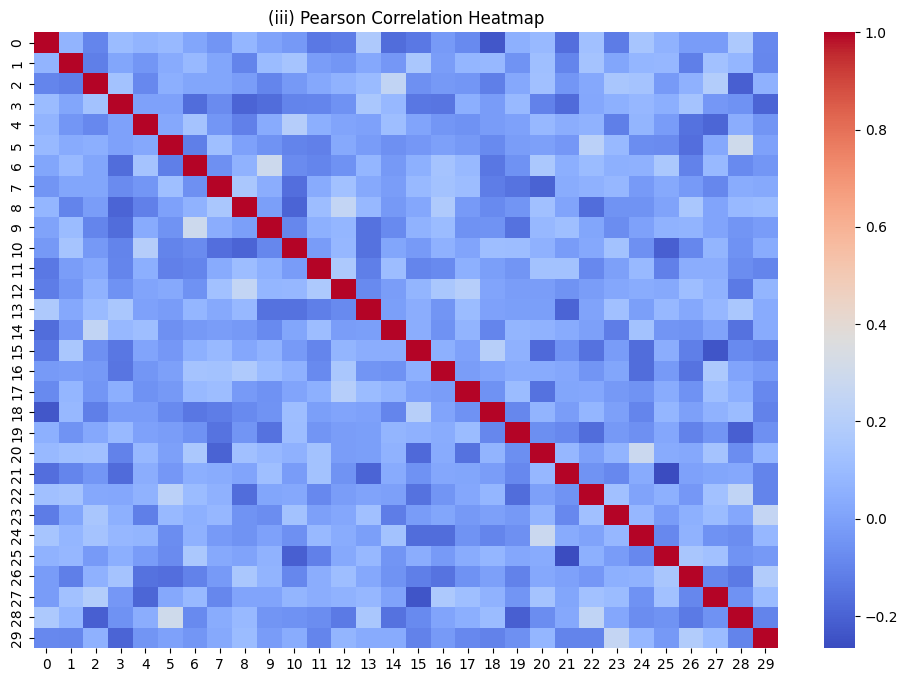

(iii) Selected columns with correlation ≤ 0.7:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

(v) Binary transformed dataset (first 5 rows):
   0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  26  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   1   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
4   0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   27  28  29  
0   0   0   0  
1   0   0   0  
2   1   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 30 columns]


<ipython-input-25-4136695880>:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


In [25]:
# Question 12: Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform the following operations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create random dataset (100 rows x 30 columns) with values between 1 and 200
np.random.seed(0)  # For reproducibility
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))

# Step (i): Replace all values between [10, 60] with NA and count rows with any NA
df_masked = df.mask(df.applymap(lambda x: 10 <= x <= 60))
rows_with_na = df_masked.isnull().any(axis=1).sum()
print(f"(i) Number of rows with missing values: {rows_with_na}")

# Step (ii): Replace all NA with column-wise mean
df_filled = df_masked.fillna(df_masked.mean(numeric_only=True))

# Step (iii): Pearson correlation heatmap and selection
correlation = df_filled.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, cmap='coolwarm', annot=False)
plt.title('(iii) Pearson Correlation Heatmap')
plt.show()

# Columns with correlation <= 0.7 (retain uncorrelated columns)
# We'll pick one column from any pair that is highly correlated (> 0.7)
selected_columns = correlation.columns[
    ~correlation.apply(lambda x: any(x[(x < 1.0) & (x > 0.7)]), axis=1)
]
df_uncorrelated = df_filled[selected_columns]
print(f"(iii) Selected columns with correlation ≤ 0.7:\n{list(selected_columns)}")

# Step (iv): Normalize all values between 0 and 10
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10

# Step (v): Replace values <= 0.5 with 1, else with 0
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)

# Optional: Print head of final binary DataFrame
print("\n(v) Binary transformed dataset (first 5 rows):")
print(df_binary.head())


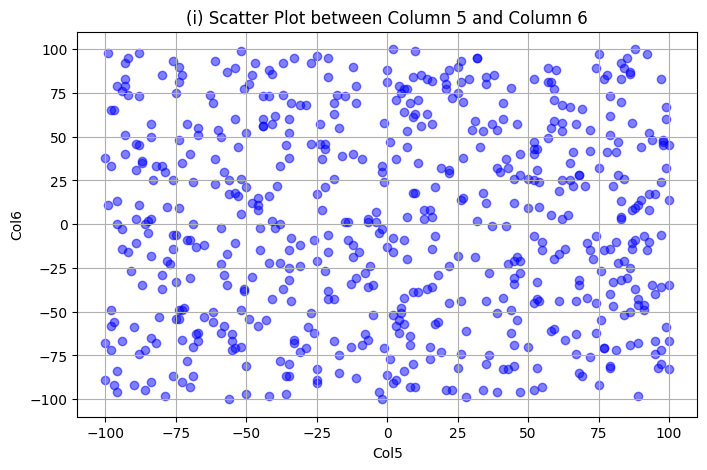

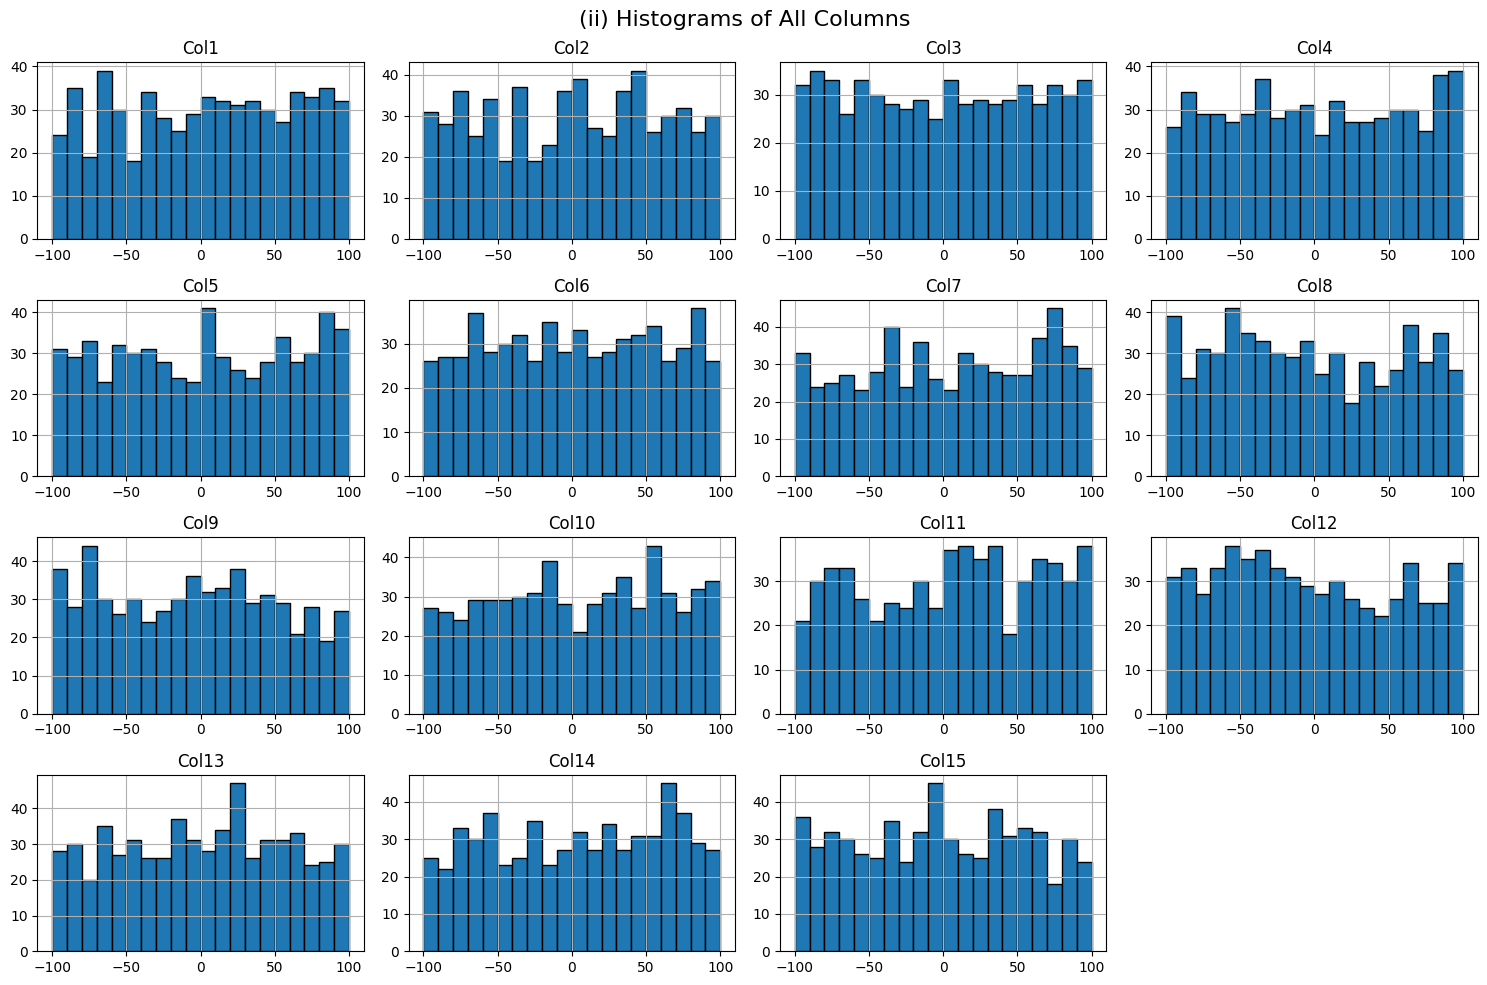

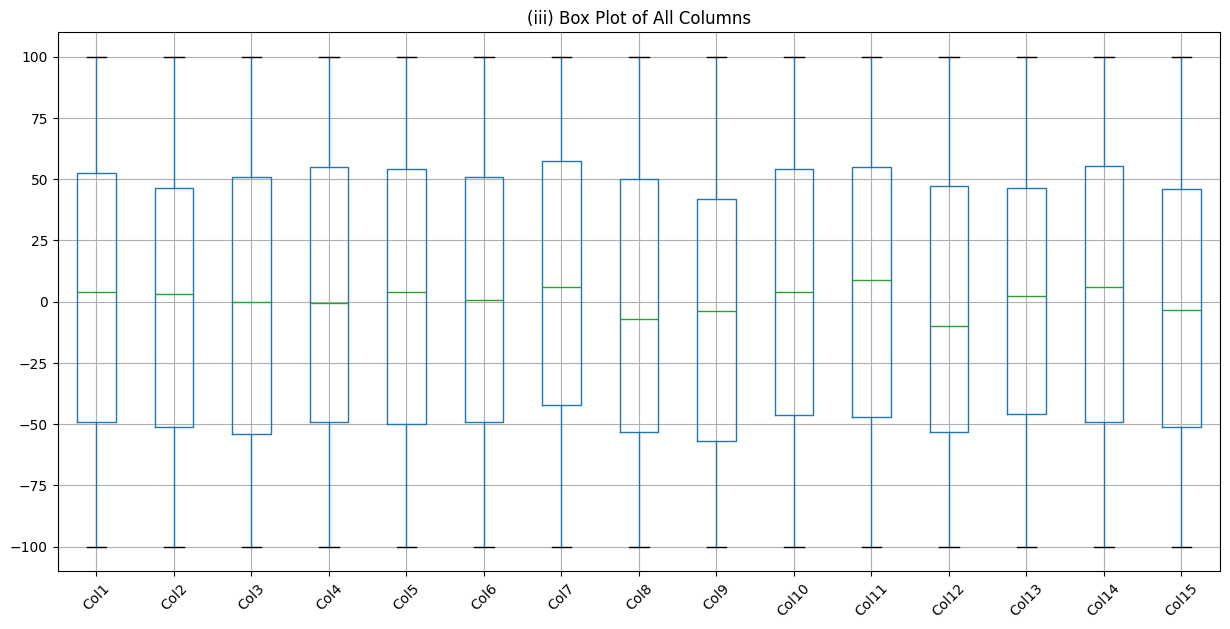

In [26]:
# Question 14: Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100]. Perform the following operations:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create random dataset (600 rows x 15 columns) with values in [-100, 100]
np.random.seed(0)
df = pd.DataFrame(np.random.randint(-100, 101, size=(600, 15)),
                  columns=[f"Col{i+1}" for i in range(15)])

# (i) Scatter plot between Column 5 and Column 6
plt.figure(figsize=(8, 5))
plt.scatter(df['Col5'], df['Col6'], color='blue', alpha=0.5)
plt.title("(i) Scatter Plot between Column 5 and Column 6")
plt.xlabel("Col5")
plt.ylabel("Col6")
plt.grid(True)
plt.show()

# (ii) Histogram of each column in a single figure
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("(ii) Histograms of All Columns", fontsize=16)
plt.tight_layout()
plt.show()

# (iii) Box plot of each column in a single figure
plt.figure(figsize=(15, 7))
df.boxplot()
plt.title("(iii) Box Plot of All Columns")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [28]:
# Question 15: Create a random dataset of 500 rows and 5 columns:
# All the values are defined between [5,10].
# Perform the following operations

!pip install numpy pandas scipy
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

# Step 1: Create random dataset of shape (500, 5) with values between 5 and 10
np.random.seed(0)
data = np.random.uniform(5, 10, size=(500, 5))
df = pd.DataFrame(data, columns=[f"Col{i+1}" for i in range(5)])

# (i) One-sample t-Test on each column (test if mean ≠ 7.5)
print("(i) One-Sample t-Test (H0: mean = 7.5)")
for col in df.columns:
    t_stat, p_val = ttest_1samp(df[col], popmean=7.5)
    print(f"{col}: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

# (ii) Wilcoxon Signed-Rank Test on each column (against 7.5)
# Note: Wilcoxon needs paired data, so we test values - 7.5 (as "difference from 7.5")
print("\n(ii) Wilcoxon Signed-Rank Test (H0: median = 7.5)")
for col in df.columns:
    try:
        stat, p_val = wilcoxon(df[col] - 7.5)
        print(f"{col}: stat = {stat:.4f}, p-value = {p_val:.4f}")
    except ValueError as e:
        print(f"{col}: Error - {e}")

# (iii) Two-Sample t-Test and Wilcoxon Rank Sum Test (Col3 vs Col4)
print("\n(iii) Two-Sample t-Test (Col3 vs Col4)")
t_stat, p_val = ttest_ind(df["Col3"], df["Col4"])
print(f"t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

print("\n(iii) Wilcoxon Rank Sum Test / Mann-Whitney U Test (Col3 vs Col4)")
stat, p_val = ranksums(df["Col3"], df["Col4"])
print(f"stat = {stat:.4f}, p-value = {p_val:.4f}")




(i) One-Sample t-Test (H0: mean = 7.5)
Col1: t-stat = -0.1335, p-value = 0.8939
Col2: t-stat = -0.3594, p-value = 0.7195
Col3: t-stat = -2.0182, p-value = 0.0441
Col4: t-stat = 1.1691, p-value = 0.2429
Col5: t-stat = 2.5444, p-value = 0.0112

(ii) Wilcoxon Signed-Rank Test (H0: median = 7.5)
Col1: stat = 62140.0000, p-value = 0.8807
Col2: stat = 61478.0000, p-value = 0.7227
Col3: stat = 55964.0000, p-value = 0.0393
Col4: stat = 58828.0000, p-value = 0.2401
Col5: stat = 54431.0000, p-value = 0.0112

(iii) Two-Sample t-Test (Col3 vs Col4)
t-stat = -2.2471, p-value = 0.0249

(iii) Wilcoxon Rank Sum Test / Mann-Whitney U Test (Col3 vs Col4)
stat = -2.1635, p-value = 0.0305
